In [3]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("/")) 

['$AV_ASW', '$Recycle.Bin', 'a', 'audio.log', 'bootmgr', 'BOOTNXT', 'cygwin64', 'Documents and Settings', 'hiberfil.sys', 'home', 'install.log', 'Intel', 'jars', 'oraclexe', 'peanut', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'Program1', 'ProgramData', 'Recovery', 'rename', 'RHDSetup.log', 'Sctipt_fixed_assets', 'swapfile.sys', 'System Volume Information', 'Temp', 'Users', 'Windows', 'Windows.old']


# Titanic Training -

### Abstract
Do a statistical analysis of how some group of people was survived more then others
Do an exploraty data analysis(EDA) of titatanic with visualizations and storyteling
Predict: Use machine learning classification models to preodict the chamce of paasengers survival

Loading data sets

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#Mashine Learning  is simply 'Mashine' and 'learning' Nothing more,nothing less

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
print(train.shape)
train.dtypes


(891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

342
549


([<matplotlib.axis.XTick at 0x8ac80e8160>,
 <a list of 2 Text xticklabel objects>)

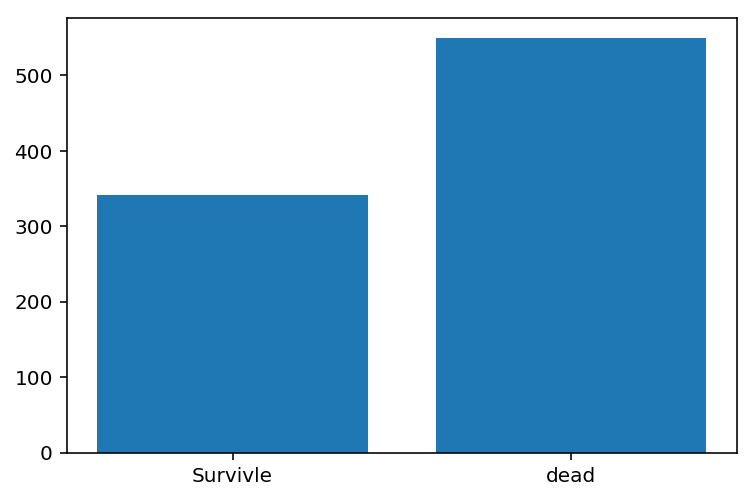

In [31]:
train
#Data Clening convert to boolean
def convert_bool(x):
    if x==0 or x=='0':
        return False
    else :
        return True
    
train['Survived'] = train['Survived'].apply(lambda x : convert_bool(x))



count_of_survivel = train[train['Survived']]['Name'].count()
count_of_not_survivel = train[~train['Survived']]['Name'].count()



#plt.bar()
print(count_of_survivel)
print(count_of_not_survivel)

dictionary = plt.figure()

D = {u'Survivle':count_of_survivel, u'dead': count_of_not_survivel}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

#plotly_fig = tls.mpl_to_plotly(dictionary)
#py.iplot(plotly_fig, filename='mpl-dictionary')

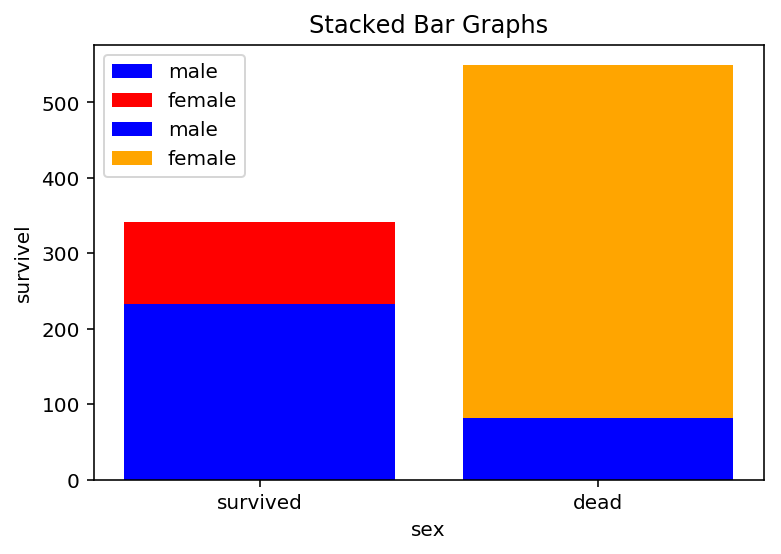

In [131]:


a = train[train['Survived']].groupby(by='Sex')['Survived'].count()
female = a['female']
male = a['male'] 

b = train[~train['Survived']].groupby(by='Sex')['Survived'].count()
female_u = b['female']
male_u = b['male'] 

xvalues = np.arange(2)
plt.bar(0,female,color='b', label ='male')
plt.bar(0,male,color='red',bottom=female, label ='female')

plt.bar(1,female_u,color='b', label ='male')
plt.bar(1,male_u,color='orange',bottom=female_u, label ='female')
plt.xticks(range(2), ('survived', 'dead'))

plt.legend()
plt.xlabel('sex')
plt.ylabel('survivel')
plt.title('Stacked Bar Graphs')
plt.legend()

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

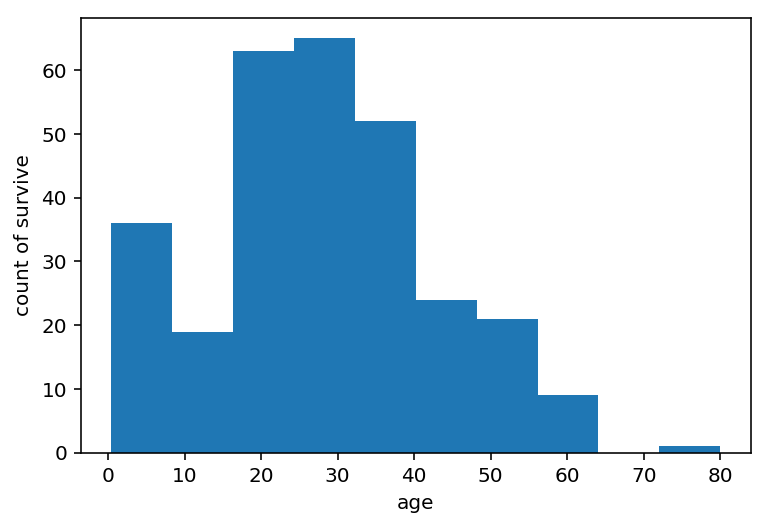

In [140]:
age = train[train['Survived']]['Age']
plt.xlabel('age')
plt.ylabel('count of survive')
plt.hist(age)


In [141]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


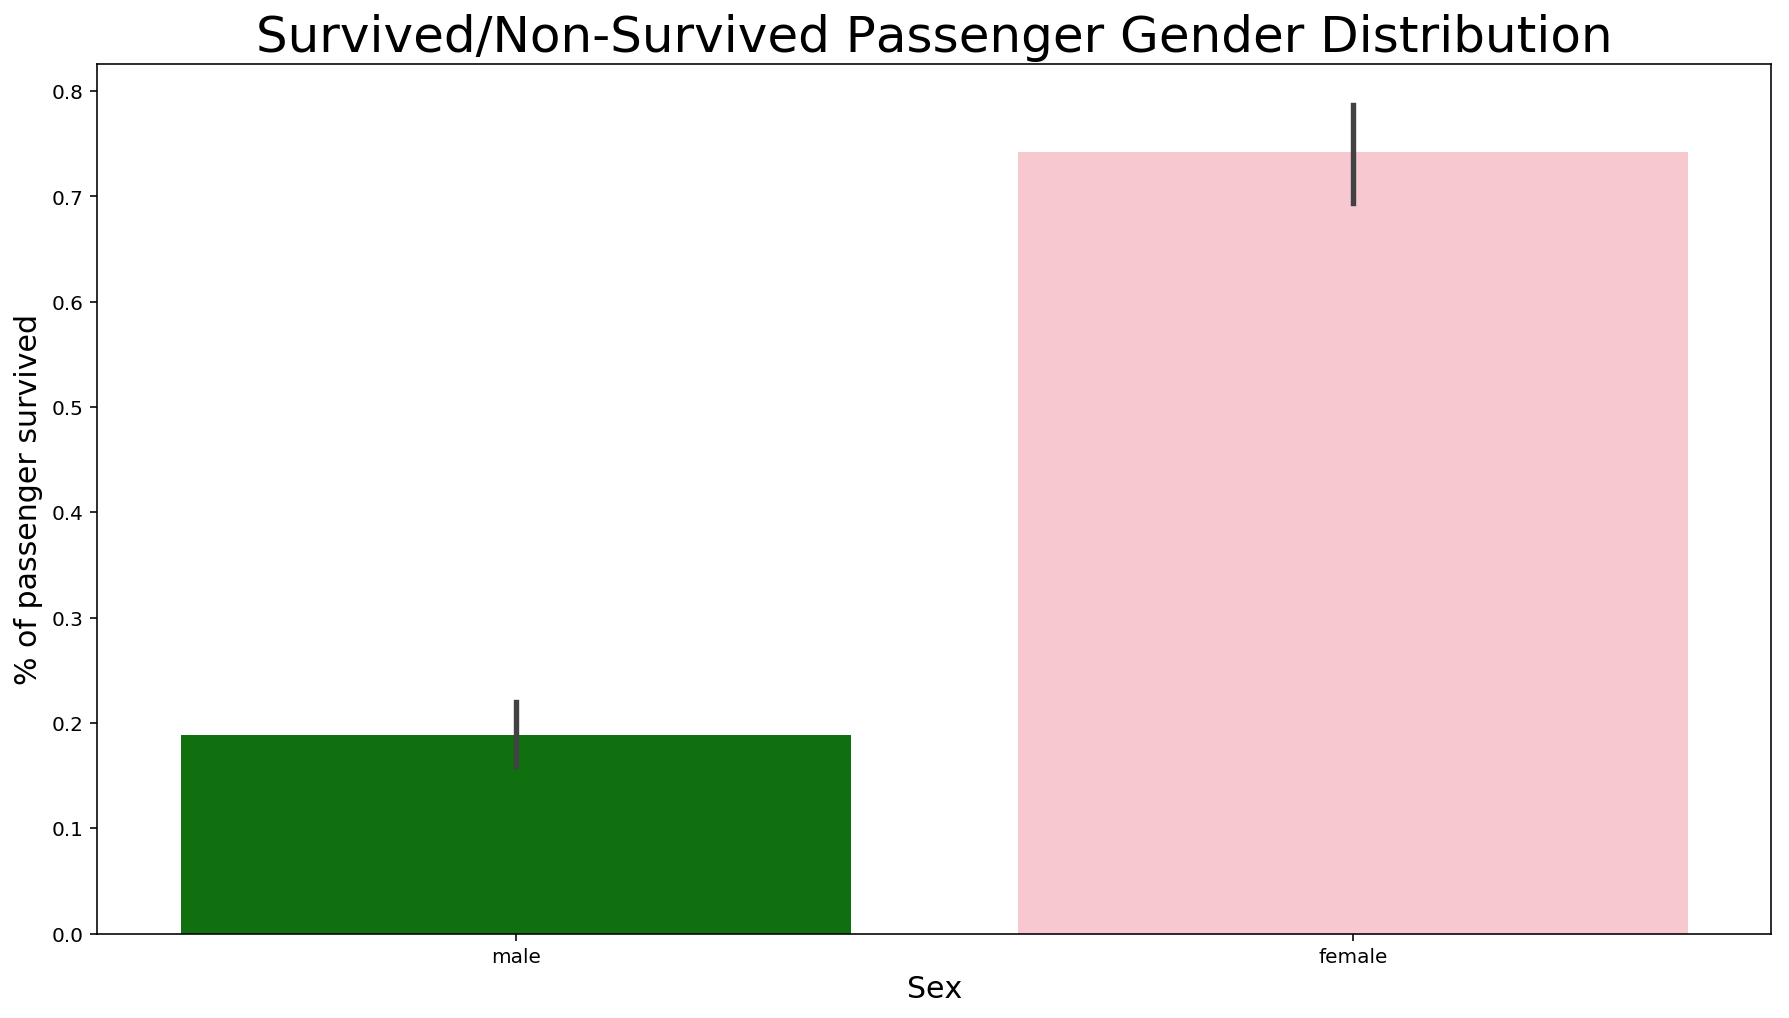

In [145]:
pal = {'male':"green", 'female':"Pink"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);

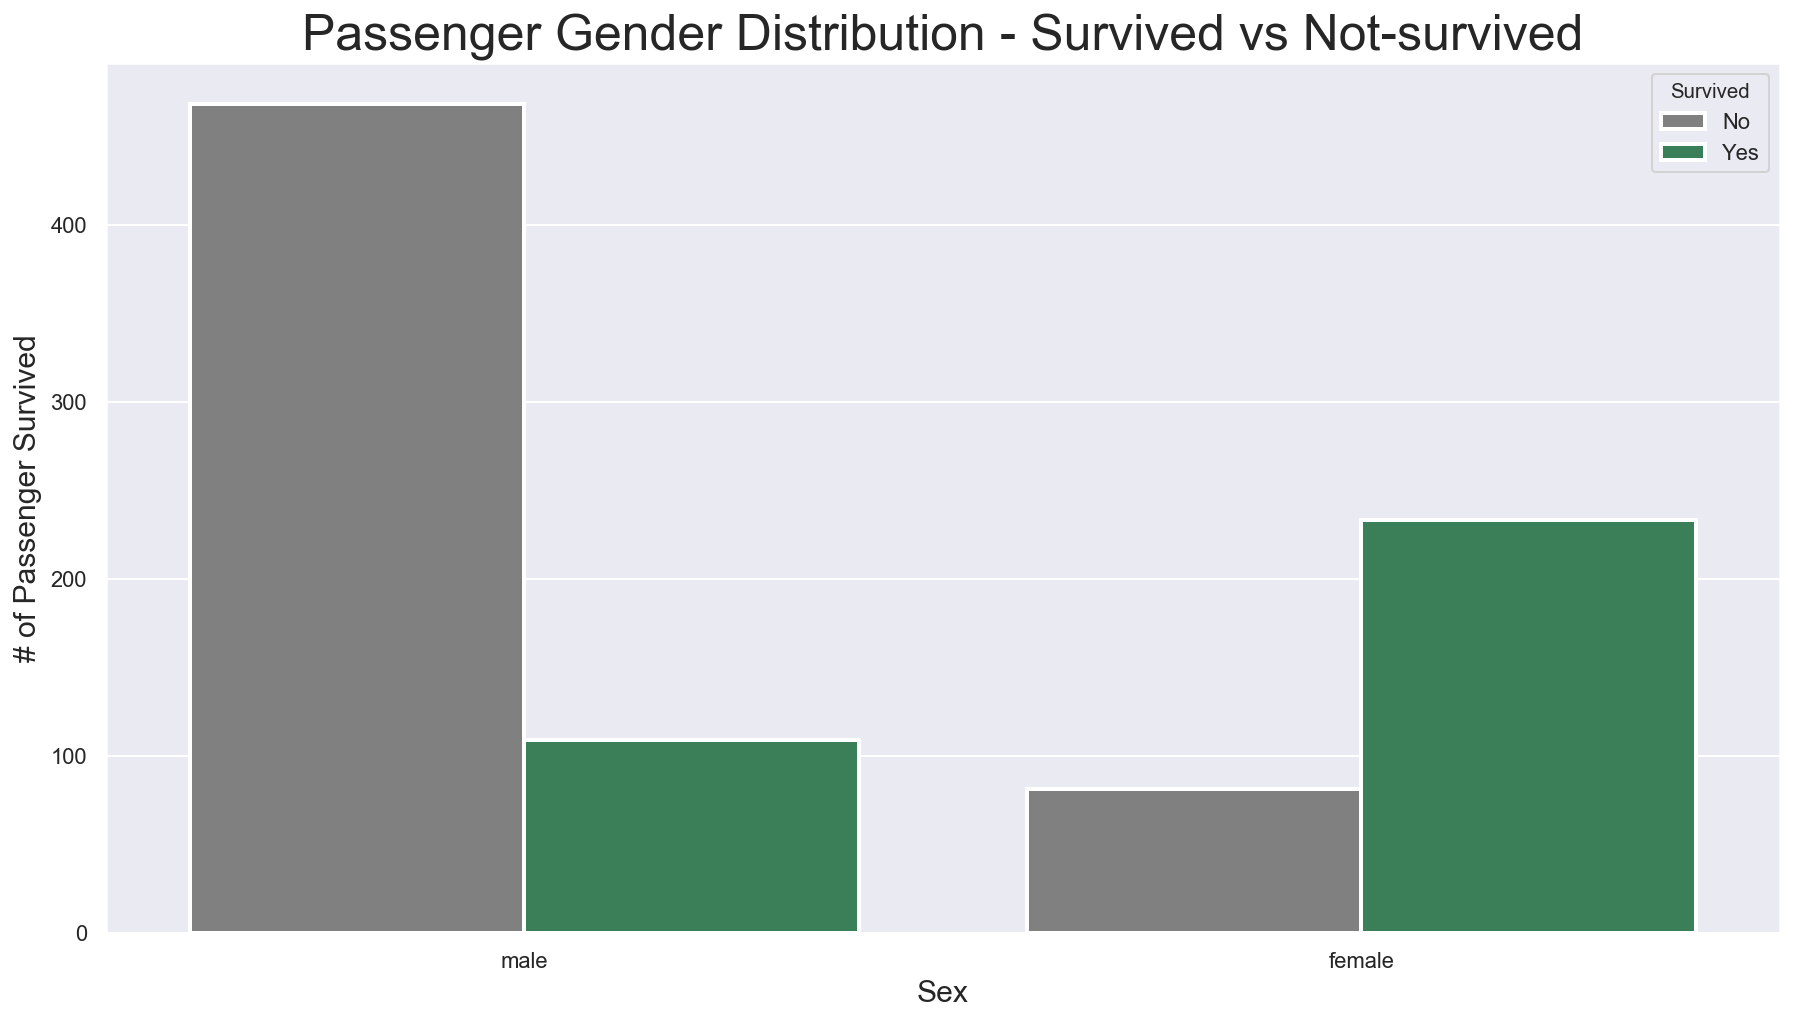

In [155]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

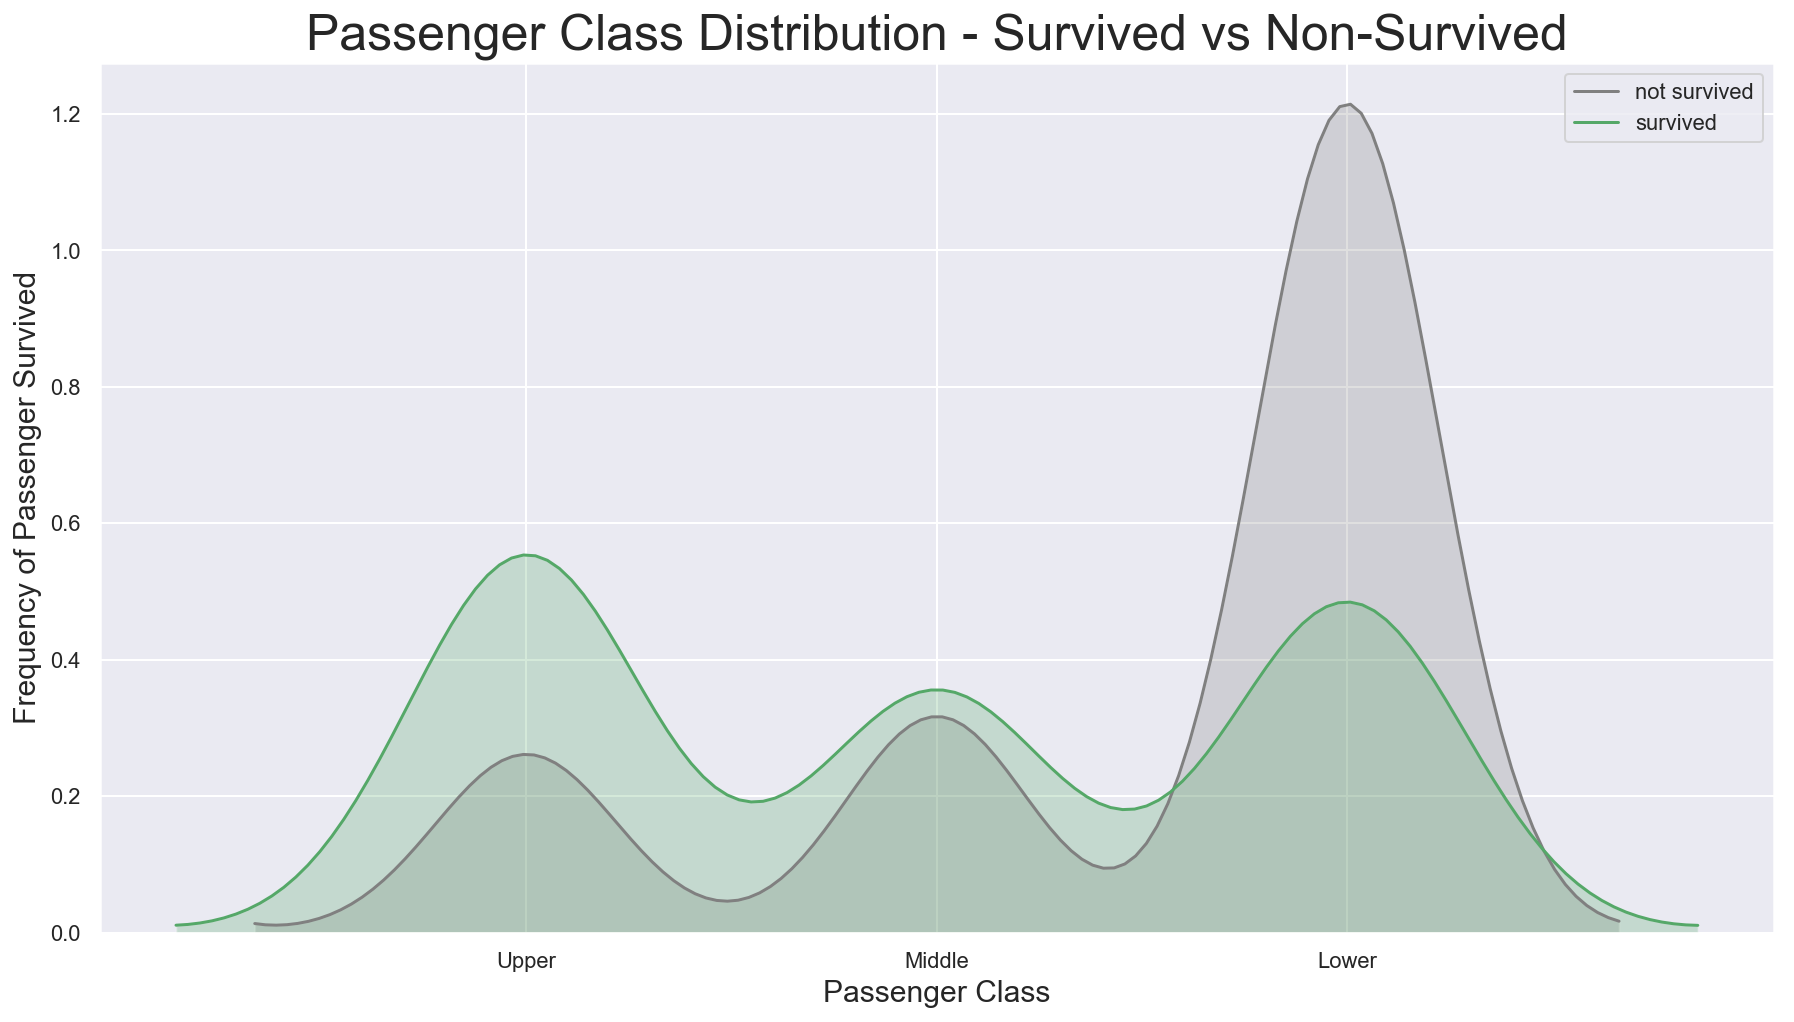

In [158]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

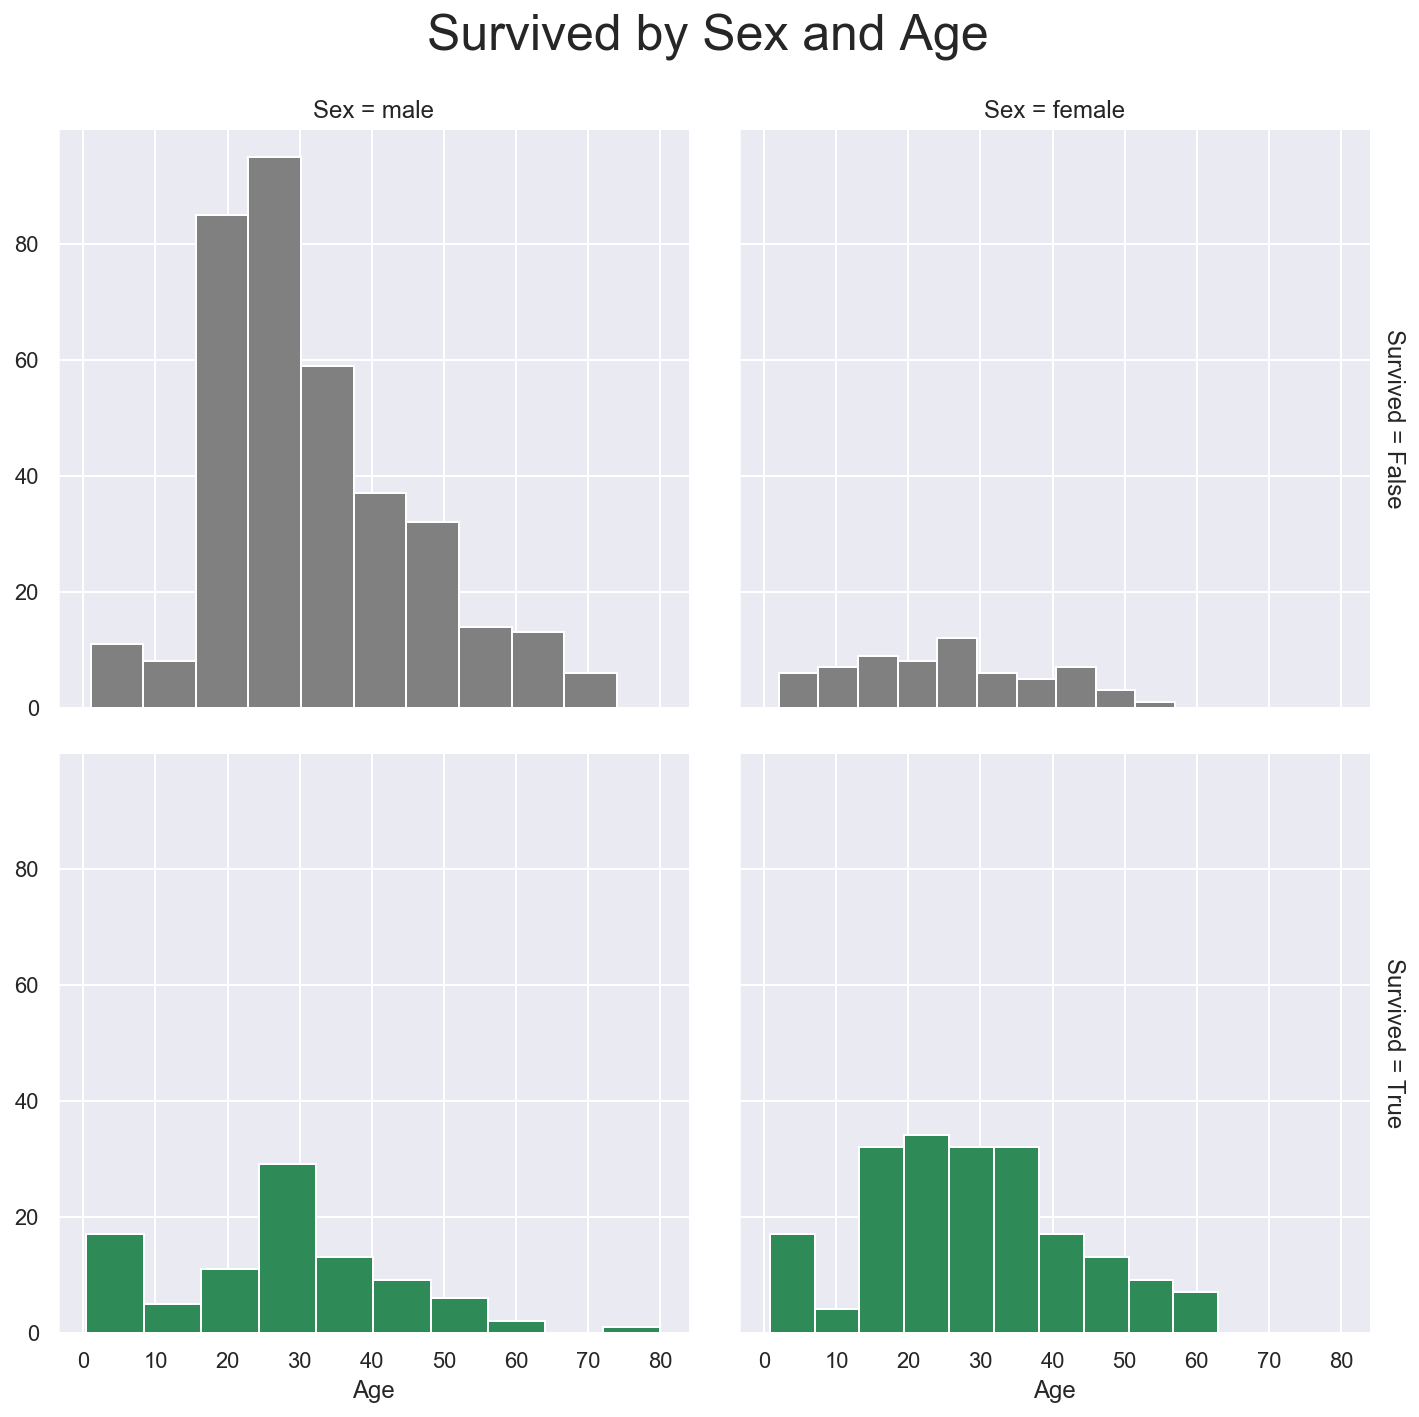

In [159]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)